<a href="https://colab.research.google.com/github/surajsoni1319/EDA-Projects/blob/main/saada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Dataset

In [ ]:
df = pd.read_csv(r"C:\Users\Suraj Soni\Downloads\saadaa_data_updated.csv")

# Display first few rows.
df.head()


,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
0,CUST00001,39,Delhi,Returning,ORD000001,08-12-2023 01:04,4015.21,Net Banking,9,5,No,Jackets,SKU0001,XXL,In Stock,Word of Mouth,36
1,CUST00002,52,Hyderabad,Returning,ORD000002,06-09-2023 20:39,2205.61,Credit Card,3,15,No,T-Shirts,SKU0002,S,Out of Stock,Google Ads,37
2,CUST00003,29,Pune,Returning,ORD000003,01-05-2023 23:15,858.84,Net Banking,8,30,No,T-Shirts,SKU0003,L,In Stock,Email Marketing,95
3,CUST00004,15,Jaipur,Returning,ORD000004,02-03-2023 02:52,500.00,UPI,1,0,No,T-Shirts,SKU0004,XXL,In Stock,Word of Mouth,10
4,CUST00005,43,Pune,Returning,ORD000005,11-04-2023 22:17,1843.50,Wallet,9,40,Yes,Sweatshirts,SKU0005,L,In Stock,Word of Mouth,0


In [ ]:
# Convert 'order_date' to datetime format and keep only the date
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y %H:%M').dt.date


# Display the updated DataFrame
print(df[['order_date']].head())

   order_date
0  2023-12-08
1  2023-09-06
2  2023-05-01
3  2023-03-02
4  2023-04-11


converting the 'order_date' column from a string format ('%d-%m-%Y %H:%M') to a datetime object and extracts only the date part, removing the time information. displaying the dates in the YYYY-MM-DD format. This preprocessing step is useful for date-based analysis, such as aggregating orders by day, month, or year.

## 3. Basic Data Exploration

In [ ]:
# Check for missing values
print(df.isnull().sum())

customer_id          0
customer_tenure      0
customer_location    0
customer_type        0
order_id             0
order_date           0
order_value          0
payment_method       0
order_frequency      0
discount_applied     0
return_status        0
product_category     0
product_sku          0
size                 0
inventory_status     0
source               0
engagement_score     0
dtype: int64


checking for missing values in the dataset. there are no missing values in any column.

In [ ]:
# Check data types
print(df.dtypes)

customer_id           object
customer_tenure        int64
customer_location     object
customer_type         object
order_id              object
order_date            object
order_value          float64
payment_method        object
order_frequency        int64
discount_applied       int64
return_status         object
product_category      object
product_sku           object
size                  object
inventory_status      object
source                object
engagement_score       int64
dtype: object


checking the data types of each column. The output shows a mix of object (text), integer, and float types.

In [ ]:
# Summary statistics for numerical columns
df.describe()

,customer_tenure,order_value,order_frequency,discount_applied,engagement_score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,31.200000,2600.555060,5.032000,14.72000,50.435000
std,17.372905,1394.337968,2.551762,14.22758,28.985582
min,1.000000,500.000000,1.000000,0.00000,0.000000
25%,17.000000,1565.915000,3.000000,0.00000,26.000000
50%,32.000000,2541.280000,5.000000,15.00000,51.000000
75%,47.000000,3541.415000,7.000000,25.00000,76.000000
max,60.000000,7251.060000,9.000000,50.00000,100.000000


## 4. Analyze Purchase Patterns

1. Total Orders per Customer

In [ ]:
customer_orders = df.groupby("customer_id")["order_id"].count().reset_index()
customer_orders.columns = ["customer_id", "total_orders"]

# Display top 5 customers with the most orders
customer_orders.sort_values(by="total_orders", ascending=True).head()


,customer_id,total_orders
0,CUST00001,1
658,CUST00659,1
659,CUST00660,1
660,CUST00661,1
661,CUST00662,1


counting the total orders per customer and displays the top 5 customers with the fewest orders. The output shows that these customers have only one order each, indicating a large number of one-time buyers.

### 2. Average Order Value (AOV)


In [ ]:
aov = df["order_value"].mean()
print(f"Average Order Value: Rs. {aov:.2f}")


Average Order Value: Rs. 2600.56


the average order value (AOV), which comes out to be Rs. 2600.56. i.e, on average, each order is around Rs. 2600.56.

### 3. Distribution of Order Values


C:\Users\Suraj Soni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


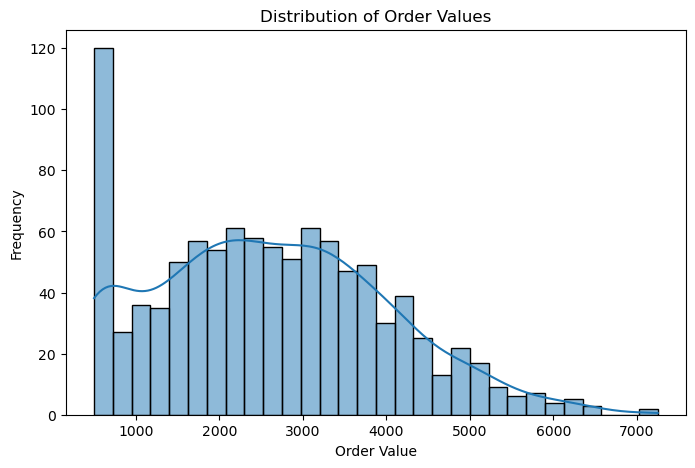

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["order_value"], bins=30, kde=True)
plt.title("Distribution of Order Values")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.show()

The data shows a right-skewed distribution of order values, with most orders concentrated in the lower to mid-range values. The highest frequency occurs around 1000, showing approximately 120 orders, while the values gradually decrease towards higher order amounts. The distribution extends from about 500 to 7000, with the majority of orders falling between 2000-4000.

Key Points:
1. Most common order values are in the lower range (around 1000)
2. Right-skewed pattern indicates fewer but significant high-value orders
3. Maximum order values reach approximately 7000
4. Clear concentration of orders in the 2000-4000 range
5. Very few orders above 6000, creating a long tail in the distribution

This pattern suggests a business model that primarily handles moderate-value transactions while occasionally processing larger orders.

## 5: Analyze Order Frequency

1. Order Frequency Distribution



C:\Users\Suraj Soni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


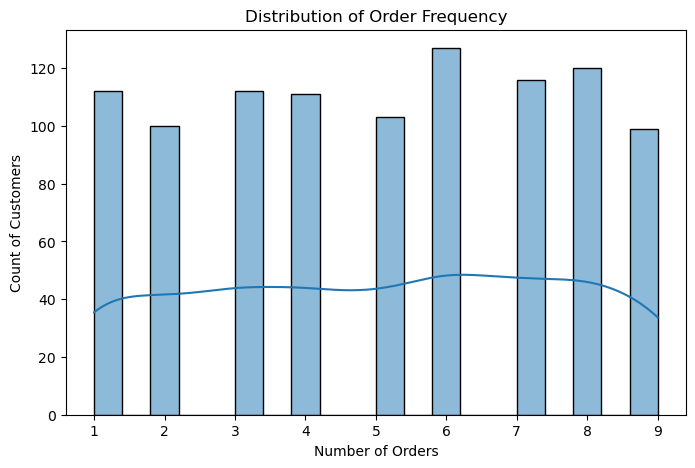

In [ ]:

plt.figure(figsize=(8,5))
sns.histplot(df["order_frequency"], bins=20, kde=True)
plt.title("Distribution of Order Frequency")
plt.xlabel("Number of Orders")
plt.ylabel("Count of Customers")
plt.show()

The distribution reveals customer ordering behavior across multiple purchases, showing a relatively uniform pattern with some notable variations. The highest number of customers (approximately 125) placed 6 orders, while the lowest count is seen at 9 orders with about 95 customers. The consistent pattern between 1-9 orders suggests strong customer retention.
Key Points:

1. Most active segment shows about 125 customers making 6 orders
2. Fairly uniform distribution with customer counts mostly ranging between 95-120
3. Good balance between one-time buyers and repeat customers
4. Minimum of 95 customers making 9 orders indicates strong loyalty
5. Stable customer distribution across different order frequencies suggests effective retention strategies

This pattern indicates successful customer engagement and loyalty, with a healthy mix of both new and returning customers.

### 2. Average Order Frequency

In [ ]:
avg_order_frequency = df["order_frequency"].mean()
print(f"Average Order Frequency: {avg_order_frequency:.2f} orders per customer")

Average Order Frequency: 5.03 orders per customer


the average order frequency, which is 5.03 orders per customer. This means, on average, each customer places 5 orders.

## 6: Compute Customer Lifetime Value (CLV)

In [ ]:
df["clv"] = df["order_value"] * df["order_frequency"] * df["customer_tenure"]

# Display top 5 customers with the highest CLV
df[["customer_id", "clv"]].sort_values(by="clv", ascending=False).head()


,customer_id,clv
908,CUST00909,2903687.64
303,CUST00304,2465284.32
180,CUST00181,2444698.80
619,CUST00620,2403855.36
228,CUST00229,2333204.64


The output shows the top 5 customers with the highest CLV, indicating which customers have contributed the most in terms of revenue over their lifetime.

### Visualizing CLV Distribution

C:\Users\Suraj Soni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


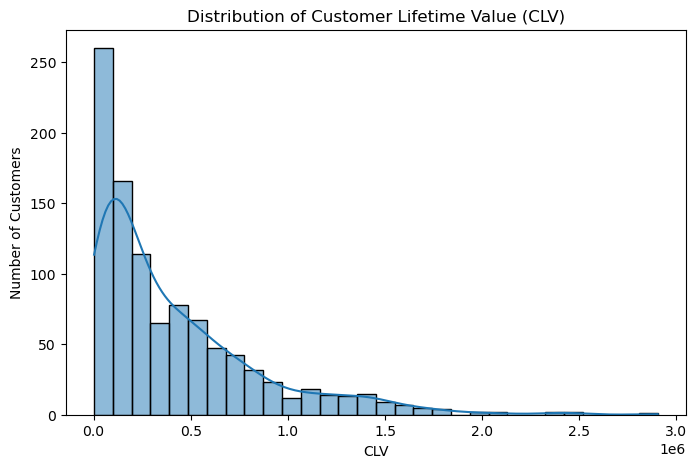

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["clv"], bins=30, kde=True)
plt.title("Distribution of Customer Lifetime Value (CLV)")
plt.xlabel("CLV")
plt.ylabel("Number of Customers")
plt.show()

The CLV distribution shows a heavily right-skewed pattern, with a large concentration of customers in the lower value ranges and a long tail extending towards higher values. The peak occurs at the lowest CLV segment with approximately 250 customers, and then steadily decreases as CLV increases up to 3.

### Customer Segmentation Based on CLV

#### Segregate customers into segments (Low, Medium, High CLV).



In [ ]:
def categorize_clv(value):
    if value < df["clv"].quantile(0.33):
        return "Low"
    elif value < df["clv"].quantile(0.66):
        return "Medium"
    else:
        return "High"

df["clv_segment"] = df["clv"].apply(categorize_clv)

# Count of customers in each segment
df["clv_segment"].value_counts()

clv_segment
High      340
Medium    330
Low       330
Name: count, dtype: int64

### Visualizing CLV Segments

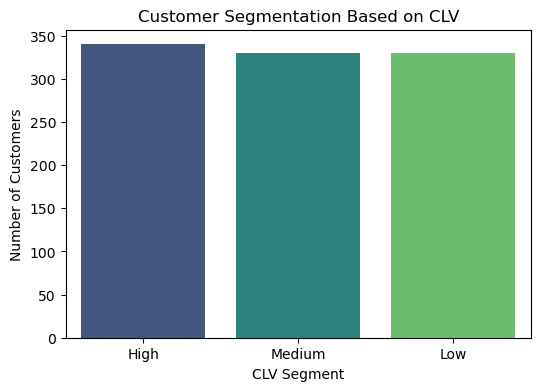

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["clv_segment"], palette="viridis")
plt.title("Customer Segmentation Based on CLV")
plt.xlabel("CLV Segment")
plt.ylabel("Number of Customers")
plt.show()

## Total Revenue by Product

In [ ]:
product_sales = df.groupby("product_category")["order_value"].sum().reset_index()
product_sales.columns = ["product_category", "total_revenue"]

# Sort products by revenue
product_sales = product_sales.sort_values(by="total_revenue", ascending=False)

# Display top-performing products
print(product_sales.head())

  product_category  total_revenue
1          Jackets      487692.11
3           Shirts      443247.27
2            Jeans      431396.90
5         T-Shirts      429779.54
0          Dresses      407475.19


### Visualizing Top Products by Revenue

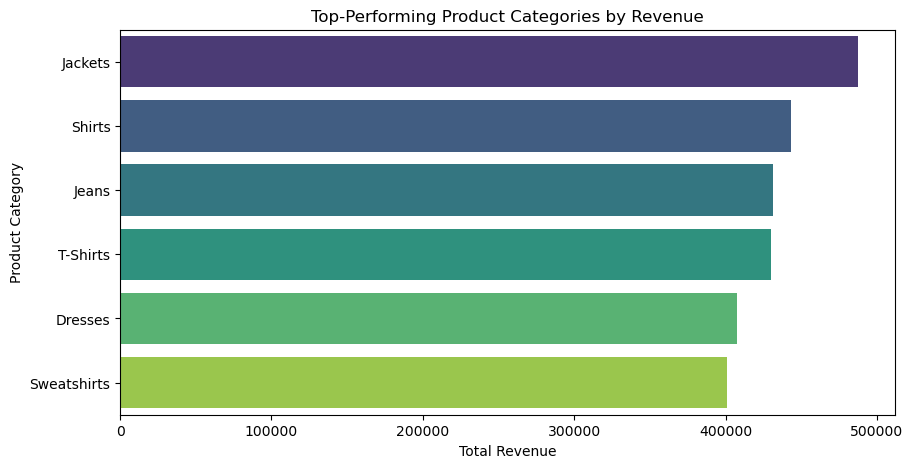

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="total_revenue", y="product_category", data=product_sales, palette="viridis")
plt.title("Top-Performing Product Categories by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.show()

## Analyze Seasonal Sales Trends

Convert Order Date to Proper Format

In [ ]:
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df["order_month"] = df["order_date"].dt.month

Monthly Sales Trends

C:\Users\Suraj Soni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Suraj Soni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


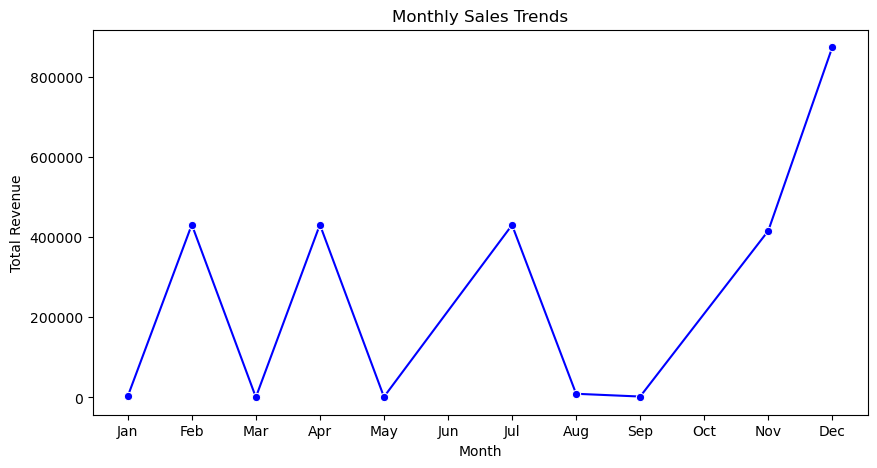

In [ ]:
monthly_sales = df.groupby("order_month")["order_value"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x="order_month", y="order_value", data=monthly_sales, marker="o", color="b")
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(range(1,13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


## Identify Key Revenue Drivers

Impact of Discounts on Revenue

C:\Users\Suraj Soni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Suraj Soni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


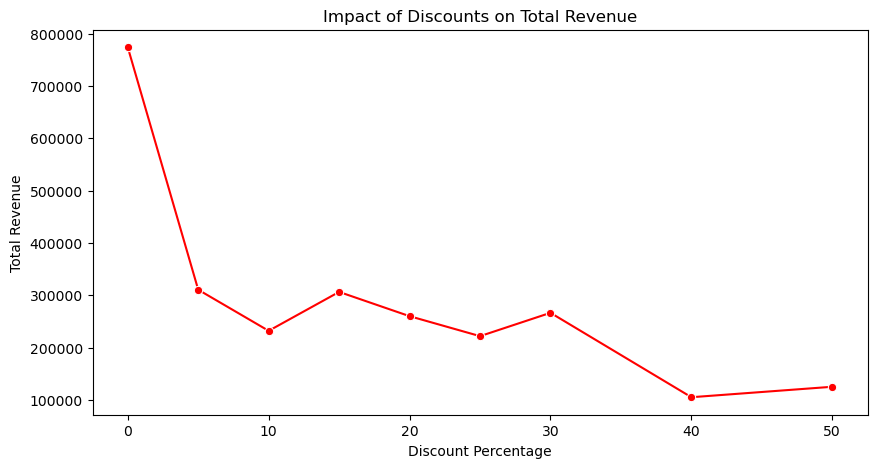

In [ ]:
discount_impact = df.groupby("discount_applied")["order_value"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x="discount_applied", y="order_value", data=discount_impact, marker="o", color="r")
plt.title("Impact of Discounts on Total Revenue")
plt.xlabel("Discount Percentage")
plt.ylabel("Total Revenue")
plt.show()


Revenue by Payment Method

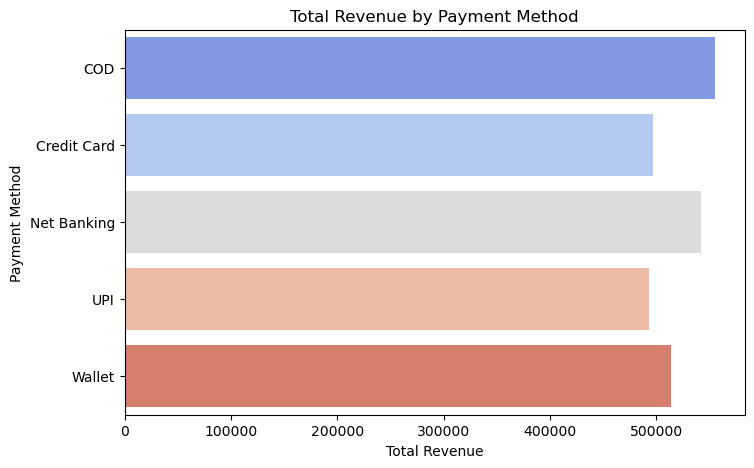

In [ ]:
payment_sales = df.groupby("payment_method")["order_value"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="order_value", y="payment_method", data=payment_sales, palette="coolwarm")
plt.title("Total Revenue by Payment Method")
plt.xlabel("Total Revenue")
plt.ylabel("Payment Method")
plt.show()


## Marketing Effectiveness Analysis
We will analyze how different marketing channels (e.g., Instagram, Google Ads, Facebook, etc.) impact conversion rates and sales performance. This will help in understanding which channels drive the most revenue and customer engagement.

checking marketing-related columns:

In [ ]:
print(df.columns)


Index(['customer_id', 'customer_tenure', 'customer_location', 'customer_type',
       'order_id', 'order_date', 'order_value', 'payment_method',
       'order_frequency', 'discount_applied', 'return_status',
       'product_category', 'product_sku', 'size', 'inventory_status', 'source',
       'engagement_score', 'clv', 'clv_segment', 'order_month'],
      dtype='object')


Key columns to focus on:

source → Marketing channel (Instagram, Google Ads, etc.)
order_value → Revenue from the order
order_id → Identifies unique orders
engagement_score → Measures interaction with the channel
customer_id → Helps track repeat customers

In [ ]:
#Check for missing values in these columns:

print(df[["source", "order_value"]].isna().sum())

source         0
order_value    0
dtype: int64


In [ ]:
# Analyze Revenue Contribution by Channel

# Group by source and sum order value
channel_revenue = df.groupby("source")["order_value"].sum().reset_index()

# Sort by highest revenue
channel_revenue = channel_revenue.sort_values(by="order_value", ascending=False)

print(channel_revenue)


            source  order_value
0  Email Marketing    556655.12
1     Facebook Ads    554021.25
4    Word of Mouth    532801.24
3        Instagram    485037.28
2       Google Ads    472040.17


In [ ]:
#Analyze Conversion Rates by Channel
# Conversion rate = (Total Orders from a Source) / (Total Engagements from the Source) × 100


# Count total orders per source
orders_per_source = df.groupby("source")["order_id"].nunique().reset_index()

# Sum total engagement score per source
engagement_per_source = df.groupby("source")["engagement_score"].sum().reset_index()

# Merge both dataframes
conversion_data = pd.merge(orders_per_source, engagement_per_source, on="source")

# Calculate conversion rate
conversion_data["conversion_rate"] = (conversion_data["order_id"] / conversion_data["engagement_score"]) * 100

# Sort in descending order
conversion_data = conversion_data.sort_values(by="conversion_rate", ascending=False)

print(conversion_data)

            source  order_id  engagement_score  conversion_rate
1     Facebook Ads       219             10654         2.055566
4    Word of Mouth       190              9483         2.003585
0  Email Marketing       219             10992         1.992358
3        Instagram       187              9548         1.958525
2       Google Ads       185              9758         1.895880


### Analyze Discount Impact on Different Channels
Does offering discounts improve conversions differently for each channel?



In [ ]:
# Group by source and check average order value with/without discounts
discount_impact = df.groupby(["source", "discount_applied"])["order_value"].mean().unstack()

print(discount_impact)

discount_applied           0            5            10           15  \
source                                                                 
Email Marketing   2539.855797  2433.055200  2694.568182  2780.921176   
Facebook Ads      2526.956714  2649.540556  2346.227895  2954.250357   
Google Ads        2754.307593  3165.460833  2393.372941  2217.268095   
Instagram         2264.771458  2950.921905  2851.763571  2570.347600   
Word of Mouth     2835.975690  2782.638261  2963.480625  2846.253913   

discount_applied           20           25           30           40  \
source                                                                 
Email Marketing   2315.283200  2153.695333  2802.394211  2190.113636   
Facebook Ads      2783.420870  2209.964286  2472.254211  2436.696250   
Google Ads        2727.327222  2606.463500  1640.429333  1673.892222   
Instagram         2209.750000  2734.554000  2965.202500  2494.464444   
Word of Mouth     2585.857895  2411.694000  3058.397826  2651.8

### Visualize the Findings
Use bar charts for better interpretation.


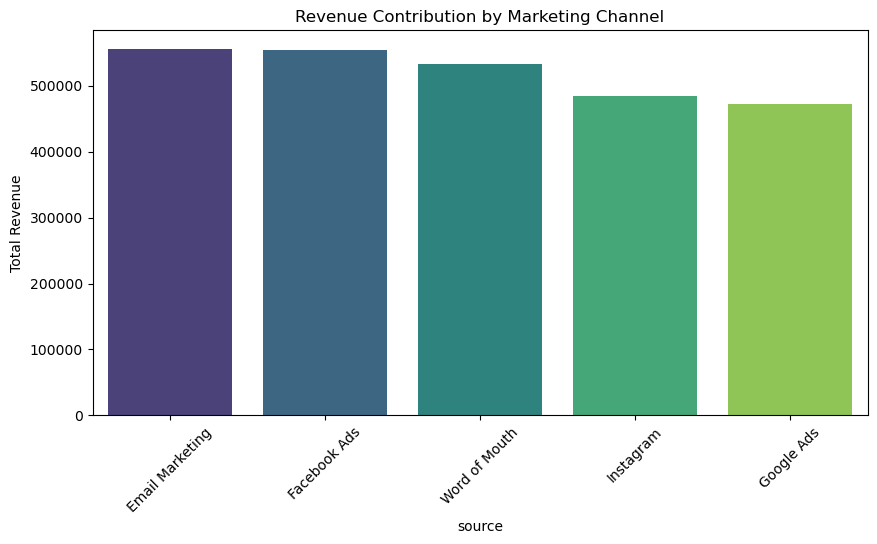

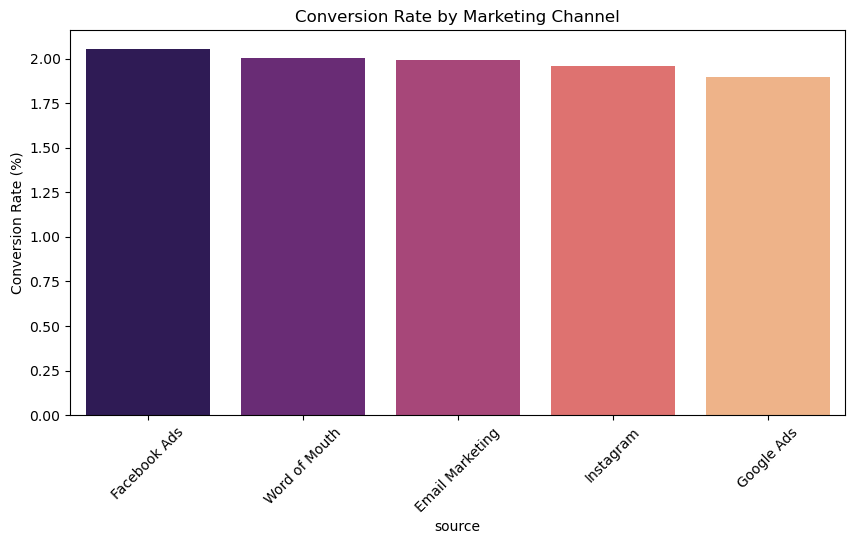

In [ ]:
# Plot revenue contribution by channel
plt.figure(figsize=(10,5))
sns.barplot(x="source", y="order_value", data=channel_revenue, palette="viridis")
plt.xticks(rotation=45)
plt.title("Revenue Contribution by Marketing Channel")
plt.ylabel("Total Revenue")
plt.show()

# Plot conversion rates by channel
plt.figure(figsize=(10,5))
sns.barplot(x="source", y="conversion_rate", data=conversion_data, palette="magma")
plt.xticks(rotation=45)
plt.title("Conversion Rate by Marketing Channel")
plt.ylabel("Conversion Rate (%)")
plt.show()

### Return Analysis
Examine return trends and correlations.

return_status
No     0.796
Yes    0.204
Name: proportion, dtype: float64


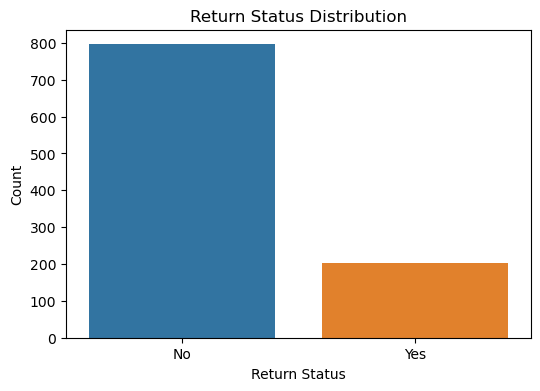

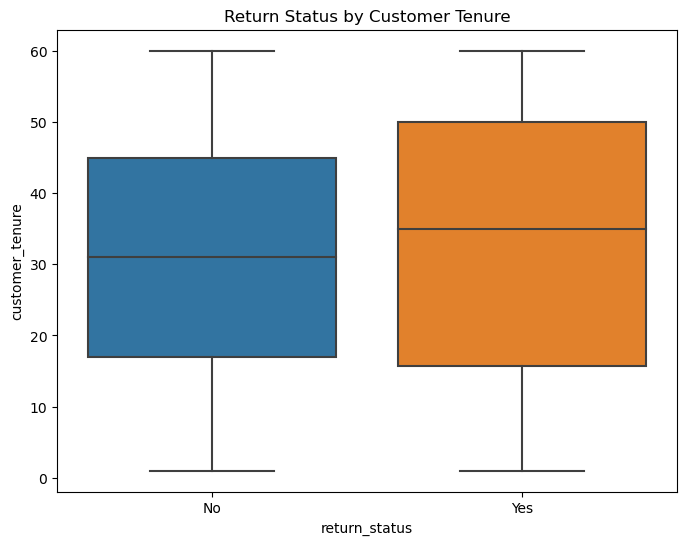

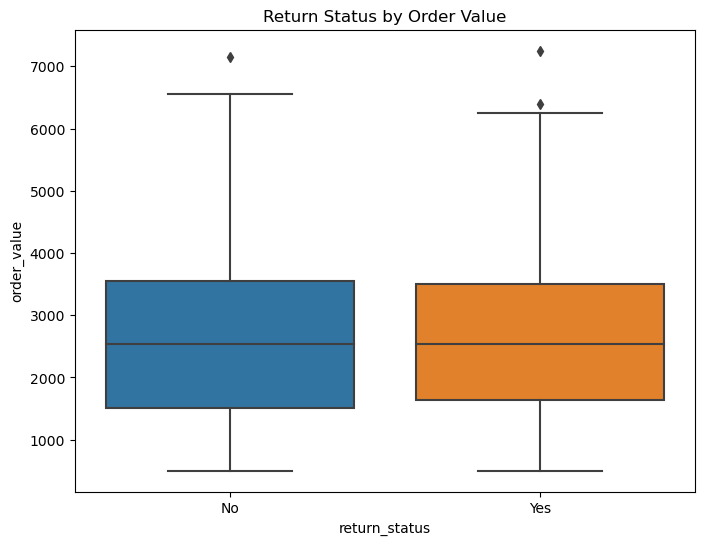

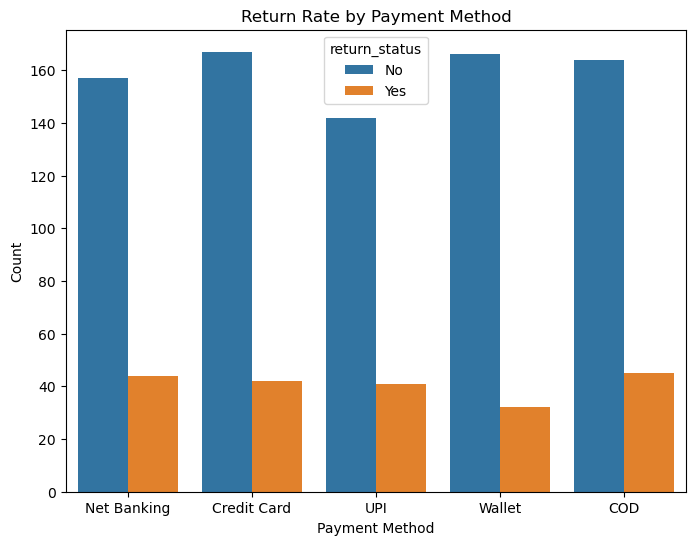

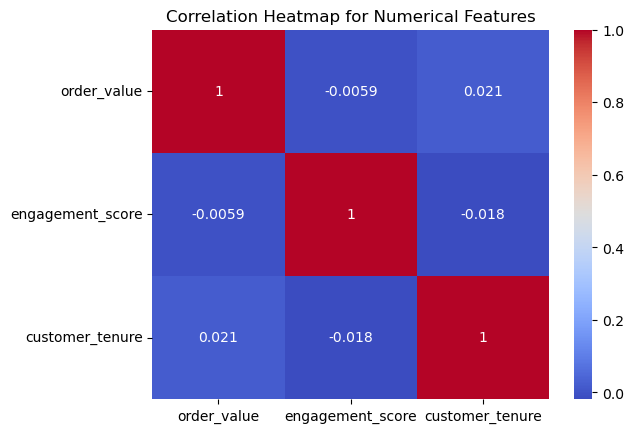

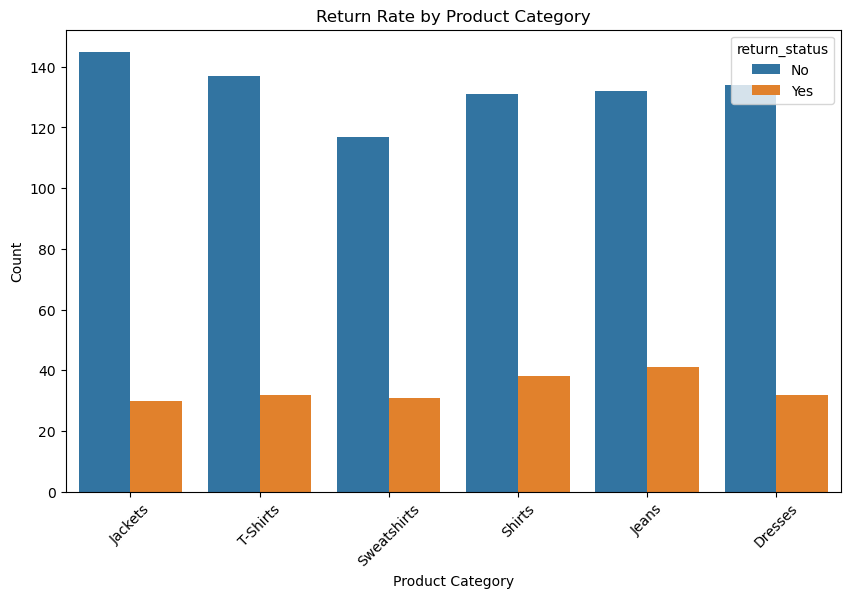

In [ ]:
# Assuming dataset is loaded into a DataFrame named df
df['order_date'] = pd.to_datetime(df['order_date'])  # Ensure correct datetime format

# 1. Return status distribution
return_counts = df['return_status'].value_counts(normalize=True)
print(return_counts)

# Plotting return distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='return_status', data=df)
plt.title('Return Status Distribution')
plt.xlabel('Return Status')
plt.ylabel('Count')
plt.show()

# 2. Return trends by customer tenure
plt.figure(figsize=(8, 6))
sns.boxplot(x='return_status', y='customer_tenure', data=df)
plt.title('Return Status by Customer Tenure')
plt.show()

# 3. Return rate by order value
plt.figure(figsize=(8, 6))
sns.boxplot(x='return_status', y='order_value', data=df)
plt.title('Return Status by Order Value')
plt.show()

# 4. Return rate by payment method
plt.figure(figsize=(8, 6))
sns.countplot(x='payment_method', hue='return_status', data=df)
plt.title('Return Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

# 5. Correlation analysis of numerical features (order_value, engagement_score, customer_tenure)
correlation_matrix = df[['order_value', 'engagement_score', 'customer_tenure']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

# 6. Return status by product category
plt.figure(figsize=(10, 6))
sns.countplot(x='product_category', hue='return_status', data=df)
plt.title('Return Rate by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Return Analysis:

## Check the Distribution of Returns

##### We first inspect the return_status column to understand the return distribution.

In [ ]:
# Count number of returns vs non-returns
return_counts = df["return_status"].value_counts()

# Calculate return rate
return_rate = return_counts / len(df) * 100

print(return_counts)  # Print actual counts
print(return_rate)  # Print percentage

return_status
No     796
Yes    204
Name: count, dtype: int64
return_status
No     79.6
Yes    20.4
Name: count, dtype: float64


#### return_status column is not in a numerical format. it likely contains string values like "Yes" and "No". The .mean() function only works on numerical data, so we need to convert "Yes" to 1 and "No" to 0.

In [ ]:
# Convert return_status column from 'Yes'/'No' to 1/0
df["return_status"] = df["return_status"].map({"Yes": 1, "No": 0})

## Return Rate by Product Category
### Which product categories have the highest return rates?


In [ ]:
# Group by product category and calculate return rate
category_returns = df.groupby("product_category")["return_status"].mean().reset_index()

# Sort in descending order
category_returns = category_returns.sort_values(by="return_status", ascending=False)

print(category_returns)

  product_category  return_status
2            Jeans       0.236994
3           Shirts       0.224852
4      Sweatshirts       0.209459
0          Dresses       0.192771
5         T-Shirts       0.189349
1          Jackets       0.171429


### Impact of Discounts on Returns

#### Do discounted products have a higher return rate?

In [ ]:
# Group by discount_applied and calculate return rate
discount_returns = df.groupby("discount_applied")["return_status"].mean().reset_index()

print(discount_returns)

   discount_applied  return_status
0                 0       0.190635
1                 5       0.144144
2                10       0.181818
3                15       0.219298
4                20       0.213592
5                25       0.175824
6                30       0.210000
7                40       0.391304
8                50       0.270833


### Return Rate by Marketing Source
#### Do certain marketing channels have higher return rates?


In [ ]:
# Group by source and calculate return rate
source_returns = df.groupby("source")["return_status"].mean().reset_index()

# Sort in descending order
source_returns = source_returns.sort_values(by="return_status", ascending=False)

print(source_returns)

            source  return_status
3        Instagram       0.245989
0  Email Marketing       0.237443
2       Google Ads       0.194595
1     Facebook Ads       0.191781
4    Word of Mouth       0.147368


### Correlation Analysis
#### Let's check if there are any correlations between returns and other factors.

In [ ]:
# Select relevant numerical columns
correlation_data = df[["order_value", "order_frequency", "discount_applied", "engagement_score", "return_status"]]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

print(correlation_matrix)

                  order_value  order_frequency  discount_applied  \
order_value          1.000000         0.029665         -0.032176   
order_frequency      0.029665         1.000000          0.002866   
discount_applied    -0.032176         0.002866          1.000000   
engagement_score    -0.005870        -0.021991         -0.036660   
return_status        0.014364         0.001432          0.078898   

                  engagement_score  return_status  
order_value              -0.005870       0.014364  
order_frequency          -0.021991       0.001432  
discount_applied         -0.036660       0.078898  
engagement_score          1.000000       0.004391  
return_status             0.004391       1.000000  


### Visualize Return Trends
#### Plot key insights for better understanding.

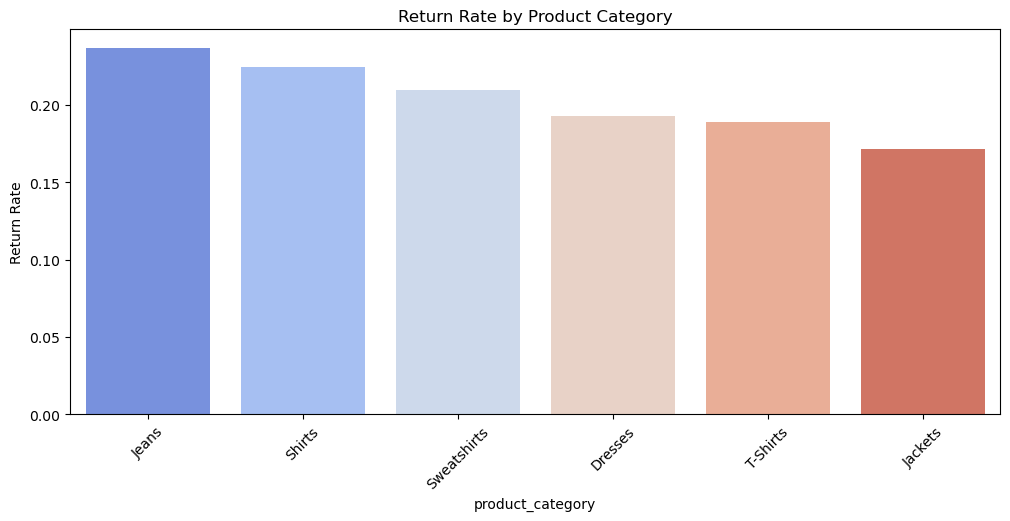

In [ ]:
# Return rate by product category
plt.figure(figsize=(12,5))
sns.barplot(x="product_category", y="return_status", data=category_returns, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Return Rate by Product Category")
plt.ylabel("Return Rate")
plt.show()

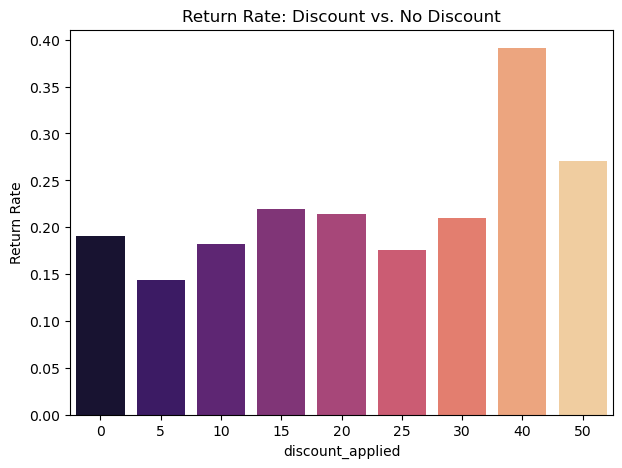

In [ ]:
# Impact of discounts on return rates
plt.figure(figsize=(7,5))
sns.barplot(x="discount_applied", y="return_status", data=discount_returns, palette="magma")
plt.title("Return Rate: Discount vs. No Discount")
plt.ylabel("Return Rate")
plt.show()

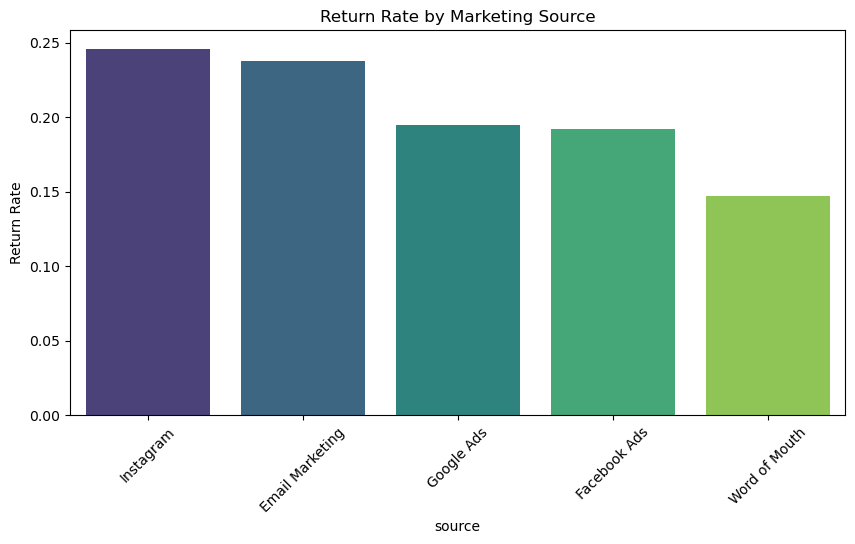

In [ ]:
# Return rate by marketing source
plt.figure(figsize=(10,5))
sns.barplot(x="source", y="return_status", data=source_returns, palette="viridis")
plt.xticks(rotation=45)
plt.title("Return Rate by Marketing Source")
plt.ylabel("Return Rate")
plt.show()

# Inventory Insights

#### Check Inventory Levels

In [ ]:
# Check basic inventory statistics
print(df["inventory_status"].value_counts())

# Identify unique inventory status values to check for inconsistencies
print(df["inventory_status"].unique())

inventory_status
In Stock        899
Out of Stock    101
Name: count, dtype: int64
['In Stock' 'Out of Stock']


#### Flag Low-Stock Products

In [ ]:
# Map "In Stock" to 1 and "Out of Stock" to 0
df["inventory_status_numeric"] = df["inventory_status"].map({"In Stock": 1, "Out of Stock": 0})

# Identify low stock products (since it's binary, any '0' means out of stock)
df["low_stock_flag"] = df["inventory_status_numeric"] == 0

# Display low-stock products
low_stock_products = df[df["low_stock_flag"]]
print(low_stock_products[["product_sku", "product_category", "inventory_status"]].head(20))

    product_sku product_category inventory_status
1       SKU0002         T-Shirts     Out of Stock
12      SKU0013          Dresses     Out of Stock
22      SKU0023         T-Shirts     Out of Stock
23      SKU0024         T-Shirts     Out of Stock
44      SKU0045          Jackets     Out of Stock
47      SKU0048            Jeans     Out of Stock
70      SKU0071          Jackets     Out of Stock
76      SKU0077            Jeans     Out of Stock
90      SKU0091          Dresses     Out of Stock
93      SKU0094          Jackets     Out of Stock
103     SKU0104         T-Shirts     Out of Stock
117     SKU0118         T-Shirts     Out of Stock
118     SKU0119          Dresses     Out of Stock
135     SKU0136            Jeans     Out of Stock
140     SKU0141           Shirts     Out of Stock
172     SKU0173          Dresses     Out of Stock
173     SKU0174          Dresses     Out of Stock
175     SKU0176      Sweatshirts     Out of Stock
179     SKU0180          Jackets     Out of Stock
